# 1. Project objective  
#### This project aims to develop a model that can estimate the prices of residential properties based on various features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Acquisition

In [2]:
df = pd.read_csv(r'train.csv')

# 3. Data Exploration  

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop('Id',axis=1, inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

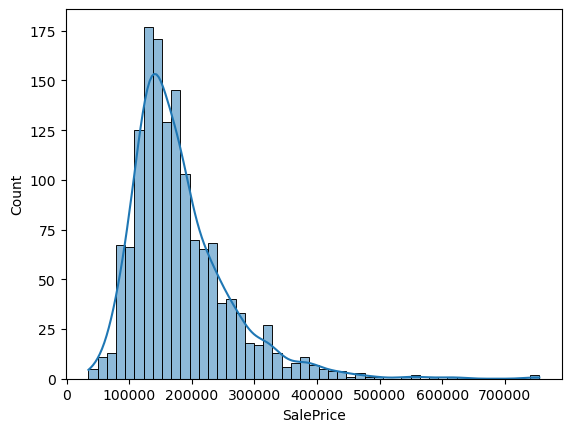

In [8]:
sns.histplot(data = df,x = 'SalePrice', kde = True)

Deviate from the normal distribution with right skewness

In [9]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending= False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

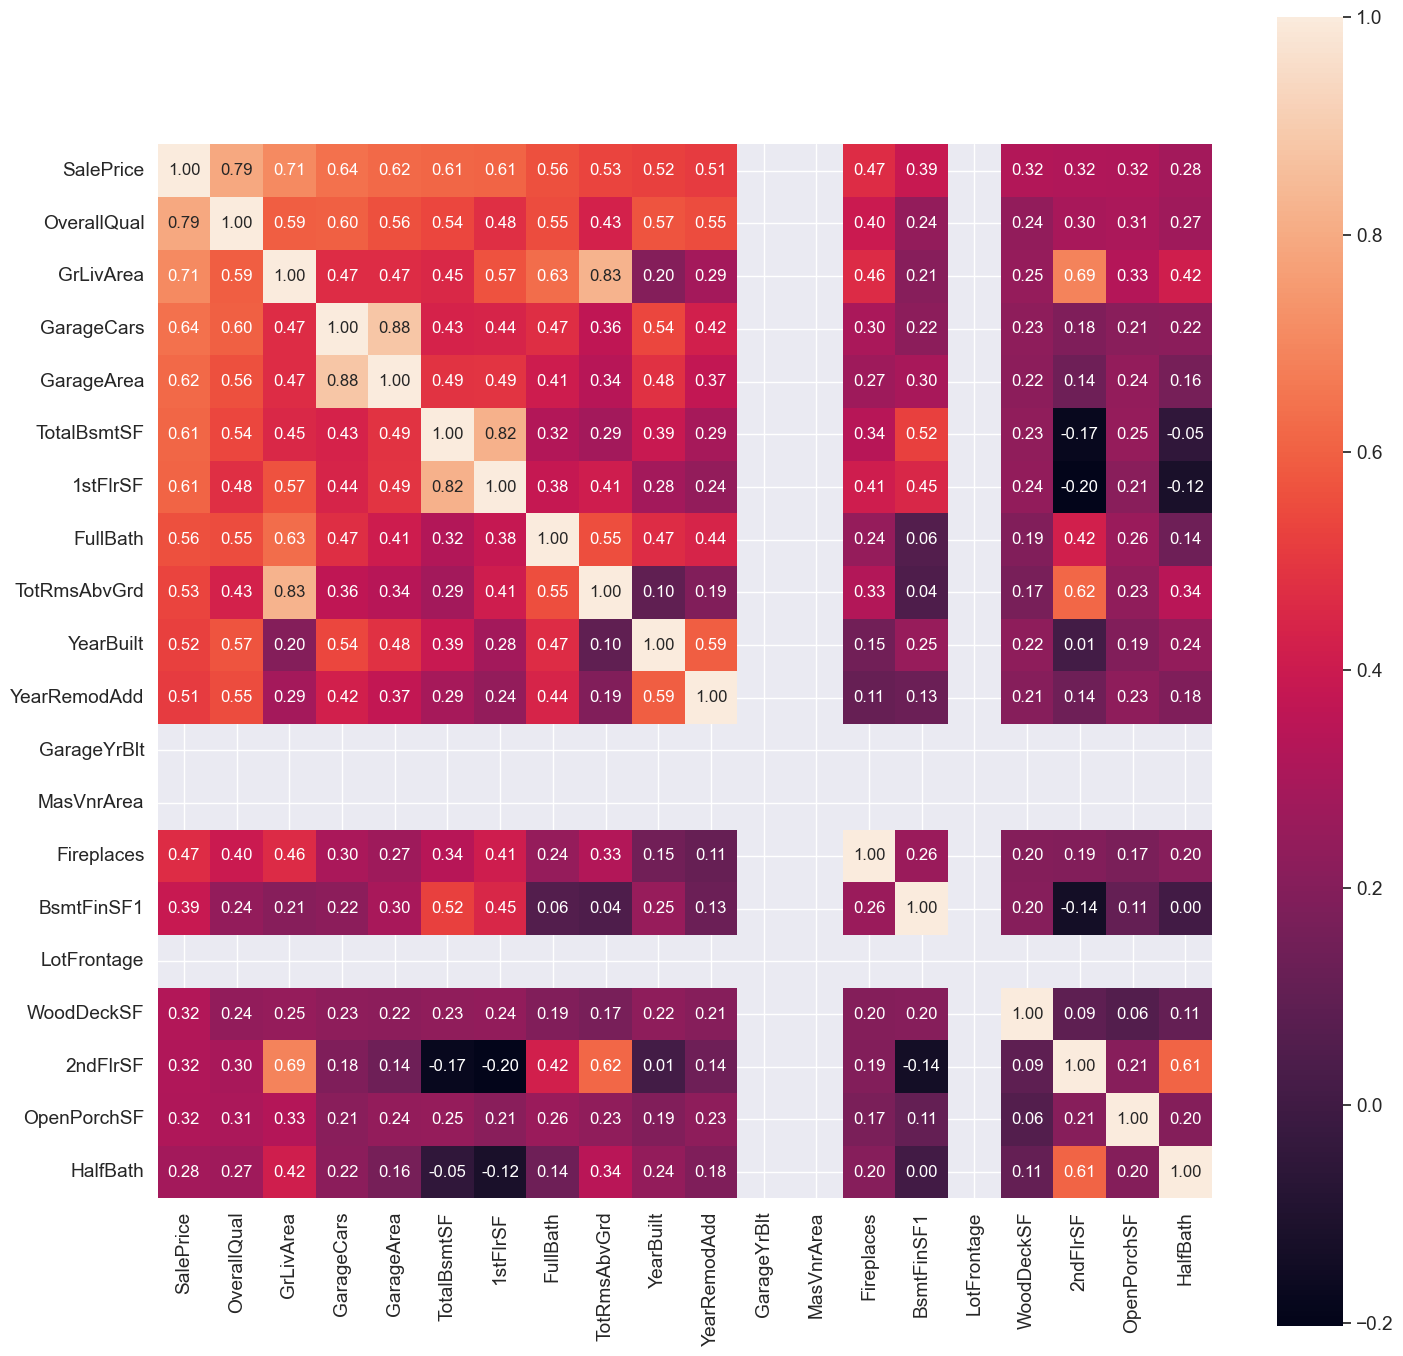

In [10]:
plt.figure(figsize=(17,17))
cols = df.corr(numeric_only=True).nlargest(20, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Since 'GarageCars' and 'GarageArea' are strongly correlated, we will keep 'GarageCars' because its correlation with 'SalePrice' is higher.
Also the same for ('TotalBsmtSF' and '1stFloor') and ('TotRmsAbvGrd', 'GrLivArea').     

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin


col_to_drop = ['GarageArea','1stFlrSF','TotRmsAbvGrd']
class columnDropperTransformer(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [12]:
df['TotRmsAbvGrd'].dtype

dtype('int64')

# 4. Data Preparation
 

### 4.1 Dealing with outliers

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

<Figure size 1200x600 with 0 Axes>

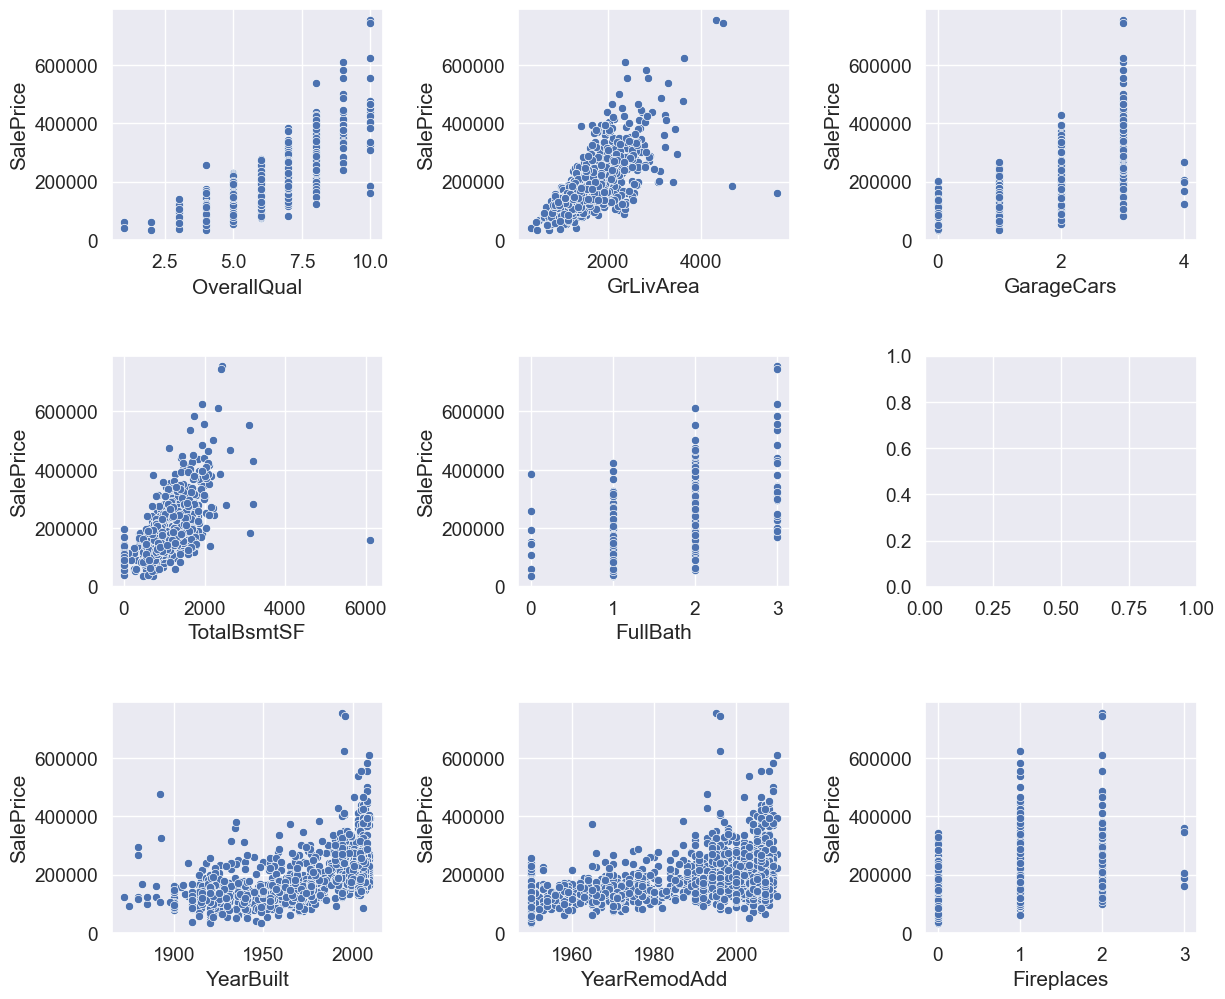

In [13]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 3, figsize=(14,12))
fig.subplots_adjust(wspace = 0.5,hspace=0.5)

sns.scatterplot(x='OverallQual',y='SalePrice',data=df,ax=axes[0][0])
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df,ax=axes[0][1])
sns.scatterplot(x='GarageCars',y='SalePrice',data=df,ax=axes[0][2])

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df,ax=axes[1][0])
sns.scatterplot(x='FullBath',y='SalePrice',data=df,ax=axes[1][1])

sns.scatterplot(x='YearBuilt',y='SalePrice',data=df,ax=axes[2][0])
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df,ax=axes[2][1])
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df,ax=axes[2][2])

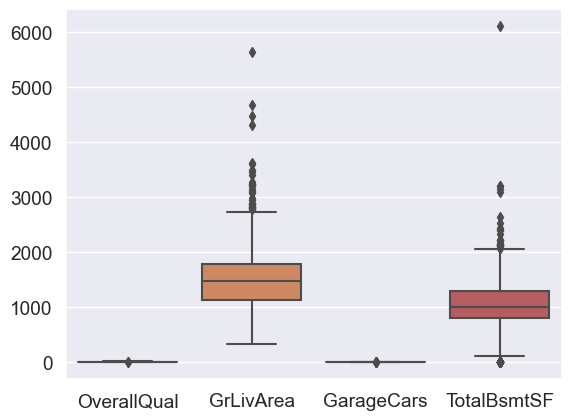

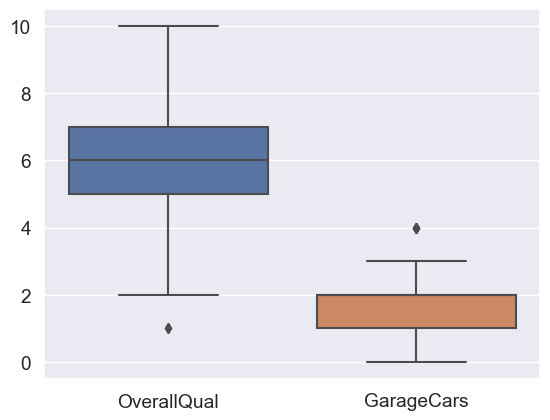

In [14]:
sns.boxplot(data= df[["OverallQual","GrLivArea","GarageCars","TotalBsmtSF"]])
plt.show()

sns.boxplot(data= df[["OverallQual","GarageCars"]])
plt.show()

In [15]:
out_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF']


for col in out_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3 - q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df = df[df[col] < upper]
    df = df[df[col] > lower]

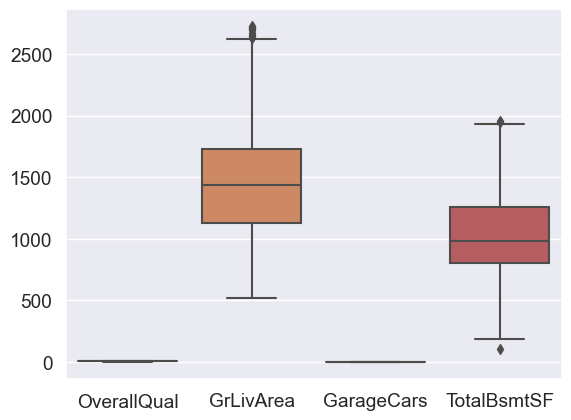

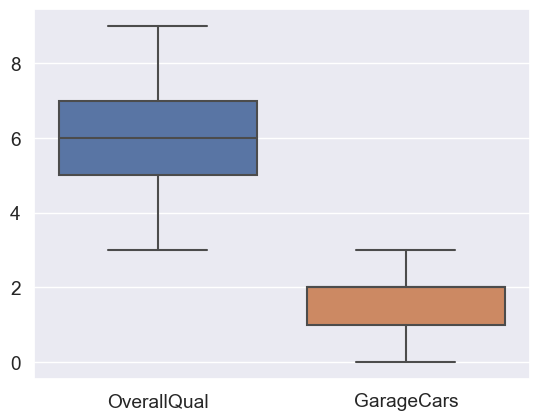

In [16]:
sns.boxplot(data= df[["OverallQual","GrLivArea","GarageCars","TotalBsmtSF"]])
plt.show()

sns.boxplot(data= df[["OverallQual","GarageCars"]])
plt.show()

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

<Figure size 1200x600 with 0 Axes>

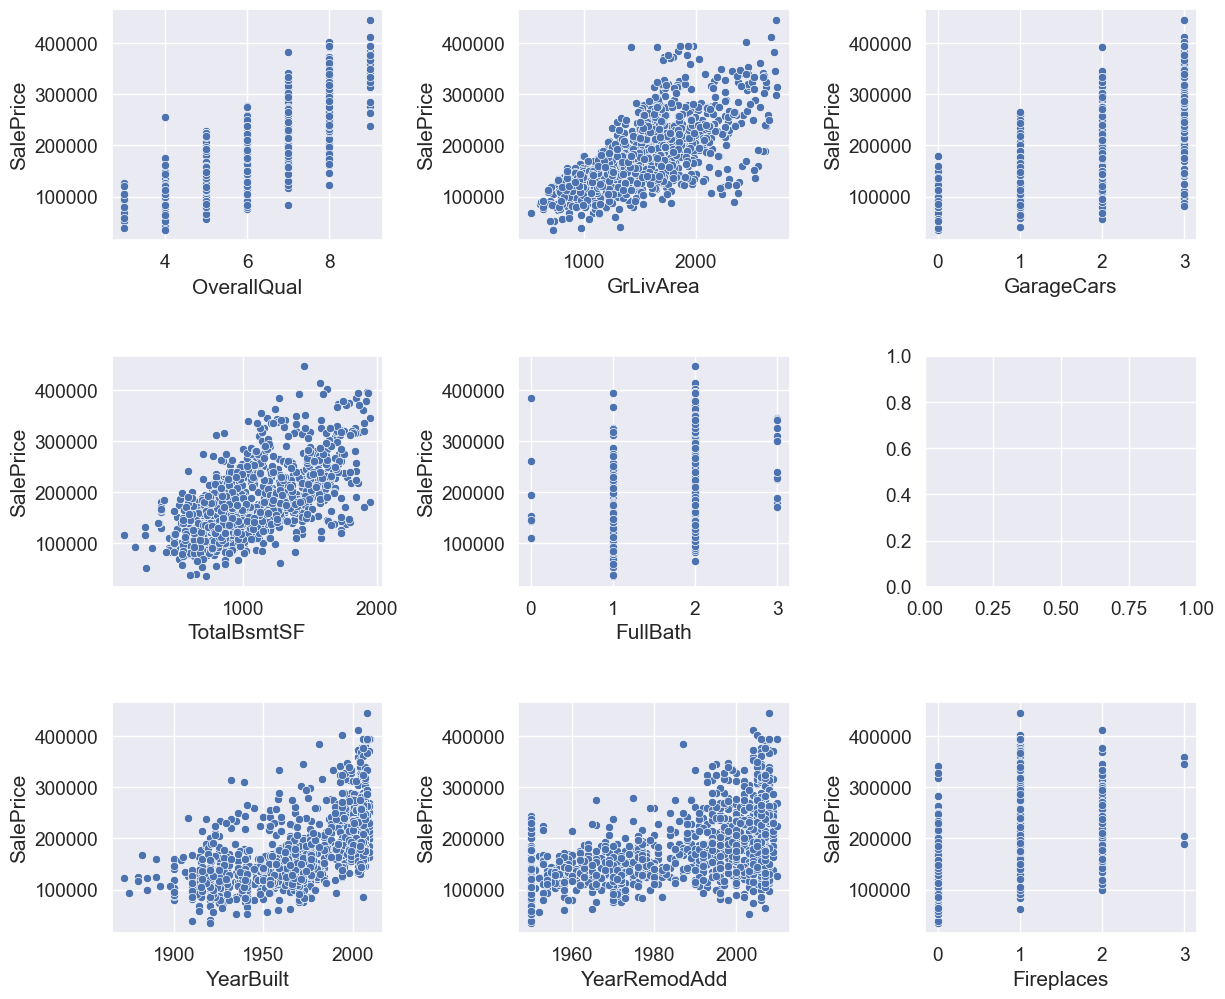

In [17]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 3, figsize=(14,12))
fig.subplots_adjust(wspace = 0.5,hspace=0.5)

sns.scatterplot(x='OverallQual',y='SalePrice',data=df,ax=axes[0][0])
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df,ax=axes[0][1])
sns.scatterplot(x='GarageCars',y='SalePrice',data=df,ax=axes[0][2])

sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df,ax=axes[1][0])
sns.scatterplot(x='FullBath',y='SalePrice',data=df,ax=axes[1][1])
#sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice',data=df,ax=axes[1][2])

sns.scatterplot(x='YearBuilt',y='SalePrice',data=df,ax=axes[2][0])
sns.scatterplot(x='YearRemodAdd',y='SalePrice',data=df,ax=axes[2][1])
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df,ax=axes[2][2])

## 4.2 Transforming Skewed Data

<Axes: xlabel='LotArea', ylabel='Count'>

<Figure size 1200x600 with 0 Axes>

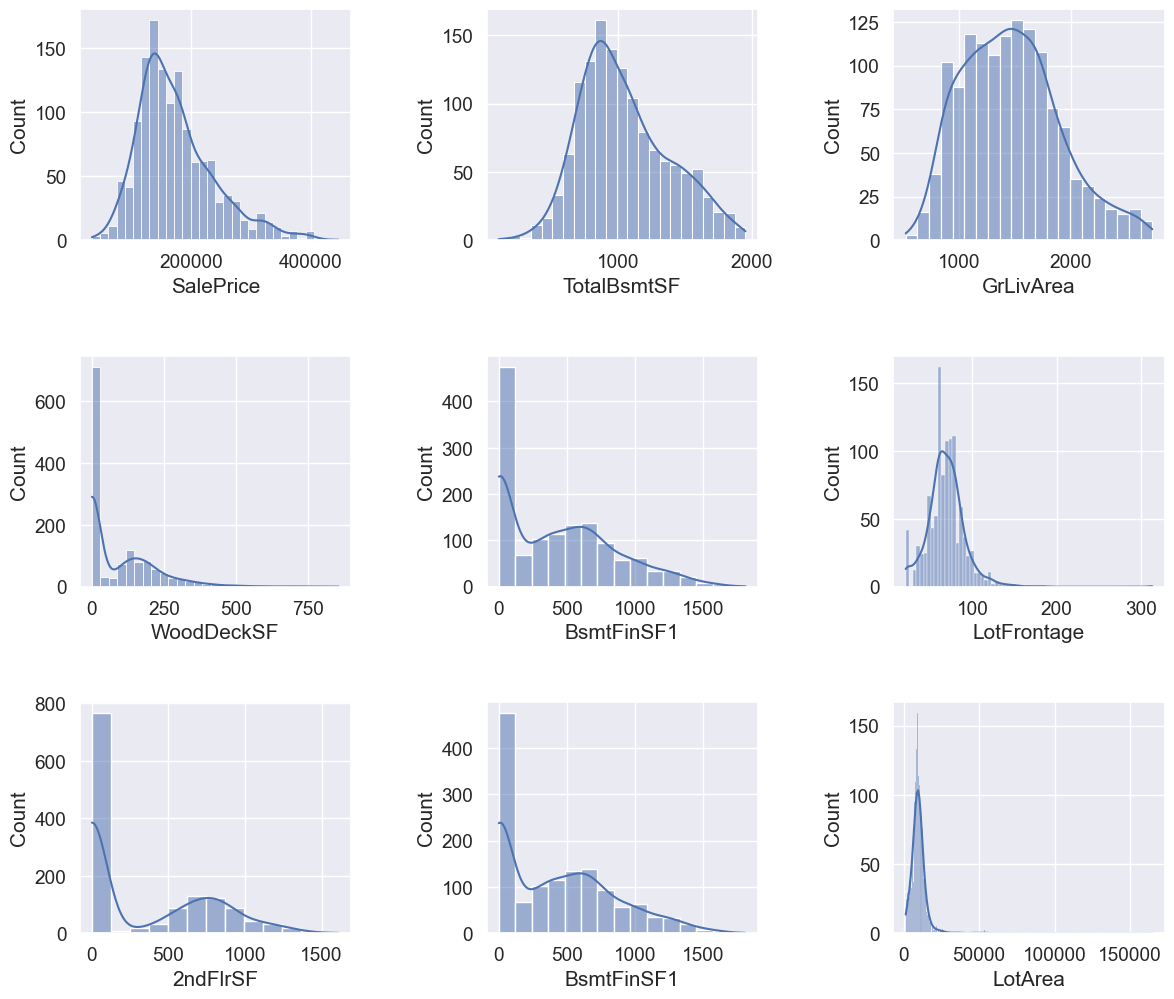

In [18]:
plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 3, figsize=(14,12))
fig.subplots_adjust(wspace = 0.5,hspace=0.5)
sns.histplot(data = df,x = 'SalePrice', kde = True,ax=axes[0][0])
sns.histplot(data = df,x = 'TotalBsmtSF', kde = True,ax=axes[0][1])
sns.histplot(data = df,x = 'GrLivArea', kde = True,ax=axes[0][2])

sns.histplot(data = df,x = 'WoodDeckSF', kde = True,ax=axes[1][0])
sns.histplot(data = df,x = 'BsmtFinSF1', kde = True,ax=axes[1][1])
sns.histplot(data = df,x = 'LotFrontage', kde = True,ax=axes[1][2])

sns.histplot(data = df,x = '2ndFlrSF', kde = True,ax=axes[2][0])
sns.histplot(data = df,x = 'BsmtFinSF1', kde = True,ax=axes[2][1])
sns.histplot(data = df,x = 'LotArea', kde = True,ax=axes[2][2])

In [19]:
from scipy.stats import skew,boxcox
from scipy.special import boxcox1p

numeric_feats = df.select_dtypes(exclude='object').columns

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,25.185797
PoolArea,21.459381
LotArea,11.332275
3SsnPorch,10.127759
LowQualFinSF,10.100497
KitchenAbvGr,5.279708
BsmtFinSF2,4.126942
BsmtHalfBath,4.007483
ScreenPorch,3.856855
EnclosedPorch,2.797197


In [20]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features_col = skewness.index.tolist()

l = ['SalePrice','OverallCond','MSSubClass','GarageArea','1stFlrSF','TotRmsAbvGrd']
for col in l:
    skewed_features_col.remove(col)

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from scipy.special import boxcox1p

class BoxCoxTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for col in self.columns:
            X[col] = boxcox1p(X[col], 0.15) 
        return X
    
    def get_params(self, deep=True):
        return {'columns': self.columns}

    def set_params(self, **params):
        if 'columns' in params:
            self.columns = params['columns']
        return self

In [22]:
from sklearn.preprocessing import FunctionTransformer,StandardScaler

log_Transform = FunctionTransformer(np.log1p,inverse_func=np.expm1,validate=True, check_inverse = False)

### 4.3 Imputing missing values

In [23]:
null_count = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([null_count, percent], axis=1, keys=['null_count', 'Percent','corr'])
missing_data.head(20)

,null_count,Percent
PoolQC,1346,0.997776
MiscFeature,1300,0.963677
Alley,1262,0.935508
Fence,1083,0.802817
MasVnrType,813,0.602669
FireplaceQu,653,0.484062
LotFrontage,244,0.180875
GarageCond,70,0.051890
GarageQual,70,0.051890
GarageType,70,0.051890


In [24]:
df_numerical_features_zero = ['MasVnrArea','GarageYrBlt','BsmtUnfSF','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','GarageCars','BsmtFullBath','BsmtHalfBath']
df_string_features_None = ['MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2','GarageCond','GarageFinish','GarageQual','GarageType','FireplaceQu','Fence','Alley','MiscFeature','PoolQC']
df_string_features_Oth =['SaleType']

df[df_numerical_features_zero] = df[df_numerical_features_zero].fillna(0)
df[df_string_features_None] = df[df_string_features_None].fillna('None')
df[df_string_features_Oth] = df[df_string_features_Oth].fillna('Oth')

In [25]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.median()))
df['Electrical'] =  df.groupby(['Neighborhood'])['Electrical'].transform(lambda val: val.fillna(val.value_counts().index.tolist()[0]))

In [26]:
df.isnull().sum().sort_values(ascending= False)

MSSubClass     0
MSZoning       0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 80, dtype: int64

### 4.4 Fit Imputers and scalers 

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].apply(str)

categorical_columns = df[['OverallCond','MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

Ordinal_Encoder_cols = df[['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass',  
        'YrSold', 'MoSold']]

One_Hot_Encoder_cols = df[['MSZoning','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
                            'Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition']]
'''
numeric_columns = df[['LotFrontage', 'LotArea', 'OverallQual',  'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF',  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',  'Fireplaces', 'GarageYrBlt',
       'GarageCars',  'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','GarageArea','1stFlrSF','TotRmsAbvGrd']]
'''
numeric_columns = df[['LotFrontage', 'LotArea', 'OverallQual',  'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF',  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',  'Fireplaces', 'GarageYrBlt',
       'GarageCars',  'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]

Median_imputer = SimpleImputer(missing_values=np.nan,strategy='median').set_output(transform="pandas")
Median_imputer.fit(numeric_columns) 

Standard_Scaler = StandardScaler().set_output(transform="pandas")
Standard_Scaler.fit(numeric_columns)

most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
most_frequent_imputer.fit(categorical_columns) 

One_Hot_Encoder = OneHotEncoder(handle_unknown='ignore')
One_Hot_Encoder.fit(One_Hot_Encoder_cols)

Ordinal_Encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
Ordinal_Encoder.fit(Ordinal_Encoder_cols)

def Nominal_to_Cat_cols(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['OverallCond'] = df['OverallCond'].apply(str)
    return df

### 4.5 Train test split

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df['OverallQual'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=42,stratify=X_train['OverallQual'])

In [29]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# 5. Creating Pipeline

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from scipy.special import boxcox1p
from sklearn.preprocessing import FunctionTransformer

categorical_columns =  ['OverallCond','MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

'''
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual',  'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF',  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',  'Fireplaces', 'GarageYrBlt',
       'GarageCars',  'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold','GarageArea','1stFlrSF','TotRmsAbvGrd', 'YrSold']
'''
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual',  'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF',  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',  'Fireplaces', 'GarageYrBlt',
       'GarageCars',  'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold','GarageArea','1stFlrSF','TotRmsAbvGrd']
cat_feature_engineering = ColumnTransformer([   
    ('Nominal_to_Cat_cols',FunctionTransformer(Nominal_to_Cat_cols,validate=False),['MSSubClass','OverallCond'])
],remainder='passthrough')

numeric_transformer = Pipeline([
    ('columnDropperTransformer',columnDropperTransformer(col_to_drop)),
    ('imputer',Median_imputer), 
    ('BoxCoxTransformer',BoxCoxTransformer(columns = skewed_features_col)),
    ('StandardScaler',Standard_Scaler),
])

categorical_transformer = Pipeline(
    [   
        ('cat_feature_engineering',cat_feature_engineering),
        ('imputer', most_frequent_imputer),       
        ('Ordinal_Encoder', Ordinal_Encoder),
        ('onehot', One_Hot_Encoder)
    ])

preprocessor = ColumnTransformer(
    transformers=[      
        ('categorical_transformers', categorical_transformer, categorical_columns),
        ('numeric_transformers', numeric_transformer, numeric_columns)   
    ],remainder='passthrough')

# 6. Machine learning models

### 6.1 Linear regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

models_list = []
mean_squared_log_error_list = []


model = LinearRegression()
reg_pipeline = Pipeline([('preprocessor', preprocessor),                   
                           ('model', model)])
Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
Transformed_Target.fit(X_train, y_train)

cv_error = np.sqrt(-cross_val_score(Transformed_Target,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()
test_error = np.sqrt(mean_squared_log_error(y_test,Transformed_Target.predict(X_test)))

print('cv_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('Linear Regression')
mean_squared_log_error_list.append(cv_error)

cv_error =  0.13602300829217875
test_error =  0.12084167435499858


## 6.2 Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

reg_pipeline = Pipeline([('preprocessor', preprocessor),
                            ('poly',PolynomialFeatures(degree=2, include_bias= False)),
                           ('model', model)])
Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
Transformed_Target.fit(X_train, y_train)
cv_error = np.sqrt(-cross_val_score(Transformed_Target,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()
test_error = np.sqrt(mean_squared_log_error(y_test,Transformed_Target.predict(X_test)))

print('cv_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('Polynomial Regression')
mean_squared_log_error_list.append(cv_error)

cv_error =  0.1463394507703482
test_error =  0.15287626619289255


## 6.3 Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RidgeRegression = Ridge()
hyperParameters = {'regressor__model__alpha':[6,7,8,9,10,11,12,13,14,15]}

reg_pipeline = Pipeline([('preprocessor', preprocessor),('model', RidgeRegression)])

Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
ridgeRegressor = GridSearchCV(Transformed_Target, hyperParameters, scoring='neg_mean_squared_log_error', cv=3)
ridgeRegressor.fit(X_train, y_train)

print(ridgeRegressor.best_params_)

cv_error = np.sqrt(-cross_val_score(ridgeRegressor,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()

test_error = np.sqrt(mean_squared_log_error(y_test,ridgeRegressor.predict(X_test)))

print('cv_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('Ridge Regression')
mean_squared_log_error_list.append(cv_error)

{'regressor__model__alpha': 9}
cv_error =  0.11400066587801976
test_error =  0.10396783237964109


## 6.4 Kernel Ridge

In [34]:
from sklearn.kernel_ridge import KernelRidge

Kernel_Ridge = KernelRidge(kernel='polynomial', degree=2)
hyperParameters = {'regressor__model__alpha':[0.0001, 0.001, 0.01, 0.05, 0.1,0.15, 0.2]}

reg_pipeline = Pipeline([('preprocessor', preprocessor),('model', Kernel_Ridge)])

Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
Kernel_Ridge = GridSearchCV(Transformed_Target, hyperParameters, scoring='neg_mean_squared_log_error', cv=3)
Kernel_Ridge.fit(X_train, y_train)

print(Kernel_Ridge.best_params_)

cv_error = np.sqrt(-cross_val_score(Kernel_Ridge,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()

test_error = np.sqrt(mean_squared_log_error(y_test,Kernel_Ridge.predict(X_test)))

print('cv_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('polynomial kernel Regression')
mean_squared_log_error_list.append(cv_error)

{'regressor__model__alpha': 0.05}
cv_error =  0.11311075687813021
test_error =  0.10469907789165823


## 6.5 LassoRegression

In [35]:
from sklearn.linear_model import Lasso

LassoRegression = Lasso(max_iter= 10000)
hyperParameters = {'regressor__model__alpha':[0.0001,0.0002,0.0003,0.0004,0.0005]}

reg_pipeline = Pipeline([('preprocessor', preprocessor),('model', LassoRegression)])

Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
lessoRegressor = GridSearchCV(Transformed_Target, hyperParameters, scoring='neg_mean_squared_log_error', cv=3)
lessoRegressor.fit(X_train, y_train)

print(lessoRegressor.best_params_)

#train_val_error = np.mean(-cross_val_score(lessoRegressor,X_train_val,y_train_val,scoring='neg_mean_absolute_error',cv=3))
cv_error = np.sqrt(-cross_val_score(lessoRegressor,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()

test_error = np.sqrt(mean_squared_log_error(y_test,lessoRegressor.predict(X_test)))

print('cv_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('Lasso Regression')
mean_squared_log_error_list.append(cv_error)

{'regressor__model__alpha': 0.0004}
cv_error =  0.11160772834359685
test_error =  0.10195018731957332


## 6.6 ElasticNet

In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_squared_error,mean_squared_log_error


param_grid = {'regressor__model__alpha':[0.004,0.0045,0.0035,0.01],
              'regressor__model__l1_ratio':[0.075, 0.065, 0.076,0.077,0.78,0.79]}

Elastic_Net = ElasticNet(max_iter=1000000)




reg_pipeline = Pipeline([('preprocessor', preprocessor),('model', Elastic_Net)])

Transformed_Target = TransformedTargetRegressor(regressor= reg_pipeline,transformer=log_Transform, check_inverse = False)
GridSearchCV_Elastic_Net = GridSearchCV(estimator=Transformed_Target,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_log_error',
                          cv=3)

GridSearchCV_Elastic_Net.fit(X_train, y_train)

print(GridSearchCV_Elastic_Net.best_params_)

cv_error = np.sqrt(-cross_val_score(GridSearchCV_Elastic_Net,X,y,scoring='neg_mean_squared_log_error',cv=3)).mean()

test_error = np.sqrt(mean_squared_log_error(y_test,GridSearchCV_Elastic_Net.predict(X_test)))
print('train_val_error = ', cv_error)
print('test_error = ', test_error)

models_list.append('ElasticNet Regression')
mean_squared_log_error_list.append(cv_error)

{'regressor__model__alpha': 0.0035, 'regressor__model__l1_ratio': 0.077}
train_val_error =  0.11235840644073104
test_error =  0.10299942465574428


In [56]:
error_df = pd.DataFrame(data ={'models':models_list,'errors':mean_squared_log_error_list})
error_df_sorted= error_df.sort_values('errors',ascending=False)

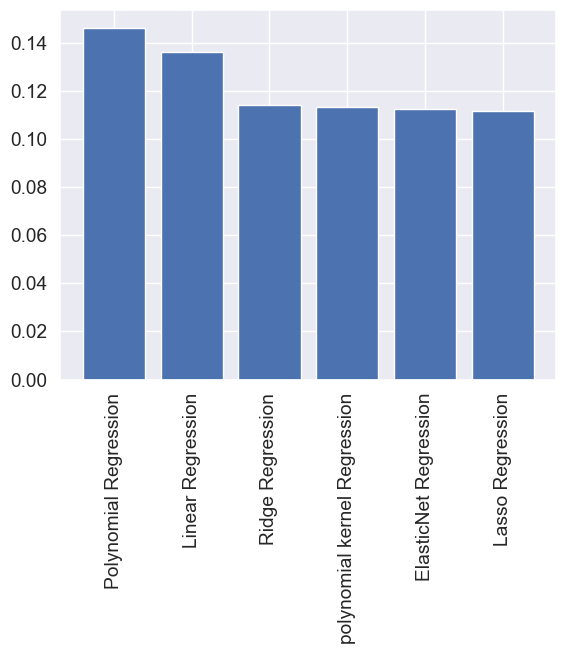

In [57]:
plt.bar('models','errors',data=error_df_sorted)
plt.xticks(rotation=90)
plt.show()